# Anime Style Transformers

## Overview

Image animation is a very interesting demo, which supports transform image to "celeba", "facepaint", "hayao", "paprika", "shinkai" etc. styles.

## Key components

Towhee Operator [Animegan](https://towhee.io/img2img-translation/animegan/src/branch/main/animegan.py) can convert an image into an animated image using AnimeganV2. And we can call it with `towhee.ops` or `DataCollection`.

It is run with `towhee.ops`, because the input and output of animegan are both `numpy.ndarray`, so we need to encode the image through `image_decode()` before uploading the image, and finally use `twhee.plot` to display the style converted image .


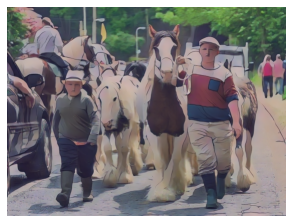

In [1]:
import towhee

input_img = towhee.ops.image_decode()('./test.png')
output_img = towhee.ops.img2img_translation.animegan(model_name = 'hayao')(input_img)

towhee.plot(output_img)

`towhee.glob()` will return a [DataCollection](https://towhee.readthedocs.io/en/main/data_collection/get_started.html), which supports rich interfaces such as `select` and `show` etc. Below we run multiple models with Animegan, so it shows images in different styles.

origin,facepaintv2,hayao,paprika,shinkai
,,,,

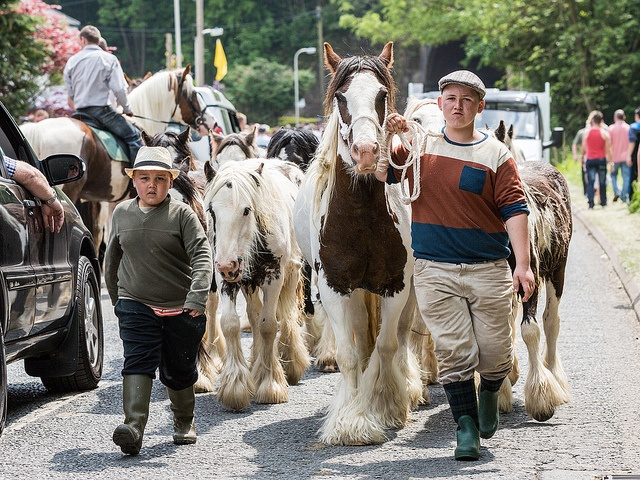
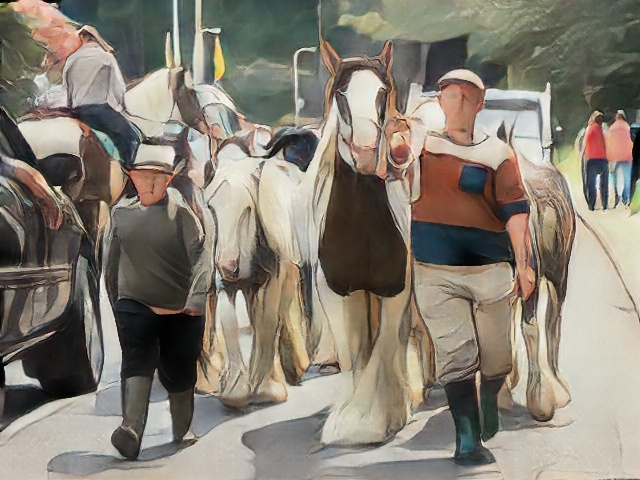
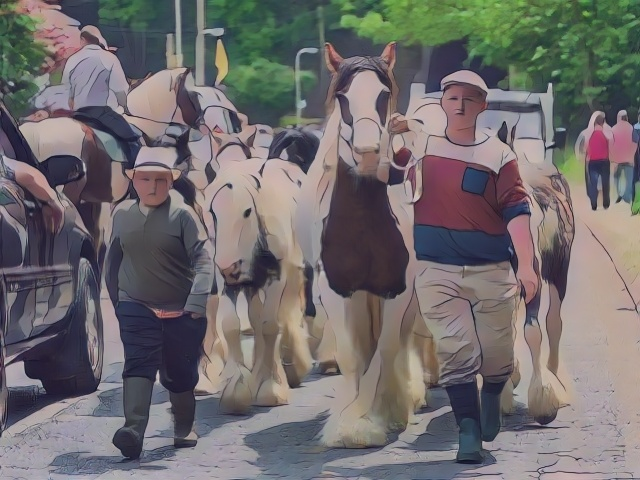
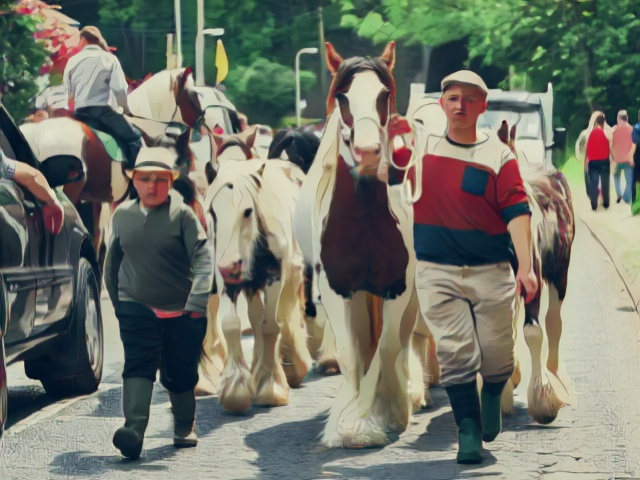
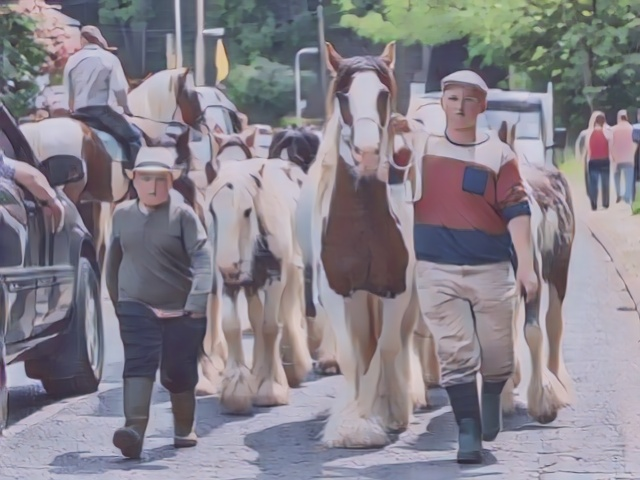

In [2]:
towhee.glob['path']('./test.png') \
      .image_decode['path', 'origin']() \
      .img2img_translation.animegan['origin', 'facepaintv2'](model_name = 'facepaintv2') \
      .img2img_translation.animegan['origin', 'hayao'](model_name = 'hayao') \
      .img2img_translation.animegan['origin', 'paprika'](model_name = 'paprika') \
      .img2img_translation.animegan['origin', 'shinkai'](model_name = 'shinkai') \
      .select['origin', 'facepaintv2', 'hayao', 'paprika', 'shinkai']() \
      .show()

## Play with Towhee and Gradio

Of course, you can also start the server with Towhee and Gradio. First, define a `trans_img` function to support for passing in an image and model version.

In [3]:
def trans_img(input_img, version):
    if version == 'celeba':
        x = towhee.ops.img2img_translation.animegan(model_name = 'celeba')(input_img)
    elif version == 'facepaintv1':
        x = towhee.ops.img2img_translation.animegan(model_name = 'facepaintv1')(input_img)
    elif version == 'facepaintv2':
        x = towhee.ops.img2img_translation.animegan(model_name = 'facepaintv2')(input_img)
    elif version == 'hayao':
        x = towhee.ops.img2img_translation.animegan(model_name = 'hayao')(input_img)
    elif version == 'paprika':
        x = towhee.ops.img2img_translation.animegan(model_name = 'paprika')(input_img)
    elif version == 'shinkai':
        x = towhee.ops.img2img_translation.animegan(model_name = 'shinkai')(input_img)

    return x.cv2_to_rgb()

Then start the Gradio server, which defines the input and output images. After running, you can upload your image in the cell, or click http://127.0.0.1:7860/.

In [4]:
import gradio

interface = gradio.Interface(trans_img, 
                             [gradio.inputs.Image(type="pil", source='upload'),
                              gradio.inputs.Radio(["celeba", "facepaintv1","facepaintv2", 
                                                  "hayao", "paprika", 'shinkai'])],
                             gradio.outputs.Image(type="numpy"), allow_flagging='never', allow_screenshot=False)

interface.launch(enable_queue=True)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f890b6637c0>,
 'http://127.0.0.1:7860/',
 None)